## 数据探索与可视化

### 实验目标
- 学习并掌握如何使用Python进行数据探索与可视化。
- 理解并应用数据探索的基本方法，包括数据清洗、格式化和描述性统计分析。
- 使用Matplotlib和Seaborn等可视化工具，绘制不同类型的图表，分析数据分布及特征之间的关系。
- 利用pandas_profiling生成数据的交互式报告，全面了解数据的分布、缺失值和异常值。

### 实验要求

1. 使用pandas读取数据集github_bot_processed_data.csv。探索pandas的显示选项，以便查看更多数据行和列。
2. 使用head()方法查看数据的前几行，并使用info()方法查看每列的数据类型，观察两者的区别。
使用describe()方法生成数据的描述性统计信息。
3. 对数据进行格式化处理，并展示不同格式（例如，日期、货币、百分比等）的效果。
4. 对public_repos、public_gists、followers、following等列进行对数变换，并查看其影响。
5. 使用Matplotlib绘制图表
    - 绘制条形图：展示label列的类别分布。
    - 绘制堆积柱状图：展示多个布尔特征（如site_admin、company等）的分布。
    - 绘制直方图：展示log_public_repos的对数变换后的数据分布。
    - 绘制散点图：展示public_repos与followers之间的关系。
    - 绘制散点矩阵：展示多个数值型特征之间的成对关系。
6. 使用Seaborn绘制图表
    - 绘制箱线图：展示不同label类别下log_followers的分布。
    - 绘制成对图：展示不同特征之间的成对关系，并根据label分类。
    - 绘制热图：展示log_public_repos、log_public_gists、log_followers和log_following等特征之间的相关性。
    - 绘制小提琴图：展示label与log_followers之间的分布差异。
7. 使用pandas_profiling.ProfileReport()生成交互式数据分析报告，分析数据的统计分布、缺失值、异常值等。

In [32]:
'''
数据格式：
label,type,site_admin,company,blog,location,hireable,bio,public_repos,public_gists,followers,following,created_at,updated_at,text_bot_count
Human,True,False,False,False,False,False,,26,1,5,1,2011-09-26 17:27:03+00:00,2023-10-13 11:21:10+00:00,0
'''
#使用pandas读取数据集github_bot_processed_data.csv。探索pandas的显示选项，以便查看更多数据行和列。
import pandas as pd

df = pd.read_csv('data/github_bot_processed_data.csv')
print("打印df：")
print(df)
print("打印df的形状：")
print(df.shape)
print("打印df的索引：")
print(df.index)
print("打印df的列名：")
print(df.columns)
print("打印df的前五行：")
print(df.head())
print("打印df的尾五行：")
print(df.tail())
print("打印df每列的数据类型：")
print(df.info())
print("打印df的统计信息：")
print(df.describe())


打印df：
       label  type  site_admin  company   blog  location  hireable  \
0      Human  True       False    False  False     False     False   
1      Human  True       False    False   True     False      True   
2      Human  True       False     True   True      True      True   
3        Bot  True       False    False  False      True     False   
4      Human  True       False    False  False     False      True   
...      ...   ...         ...      ...    ...       ...       ...   
19763    Bot  True       False     True   True      True     False   
19764  Human  True       False    False  False     False     False   
19765  Human  True       False     True  False      True     False   
19766  Human  True       False     True  False     False     False   
19767    Bot  True       False    False  False      True     False   

                                                     bio  public_repos  \
0                                                    NaN            26   
1    

In [33]:
import numpy as np

df['created_at'] = pd.to_datetime(df['created_at'])
df['updated_at'] = pd.to_datetime(df['updated_at'])
df['public_repos'] = df['public_repos'].astype('int')
df['public_gists'] = df['public_gists'].astype('int')
df['followers'] = df['followers'].astype('int')
df['following'] = df['following'].astype('int')
df['text_bot_count'] = df['text_bot_count'].astype('int')

print("展示效果：")
print(df.head())

展示效果：
   label  type  site_admin  company   blog  location  hireable  \
0  Human  True       False    False  False     False     False   
1  Human  True       False    False   True     False      True   
2  Human  True       False     True   True      True      True   
3    Bot  True       False    False  False      True     False   
4  Human  True       False    False  False     False      True   

                                                 bio  public_repos  \
0                                                NaN            26   
1  I just press the buttons randomly, and the pro...            30   
2       Time is unimportant,\r\nonly life important.           103   
3                                                NaN            49   
4                                                NaN            11   

   public_gists  followers  following                created_at  \
0             1          5          1 2011-09-26 17:27:03+00:00   
1             3          9          6 2015

In [34]:
# 未对原数据产生影响，新增了列
df['log_public_repos'] = np.log1p(df['public_repos'])
df['log_public_gists'] = np.log1p(df['public_gists'])
df['log_followers'] = np.log1p(df['followers'])
df['log_following'] = np.log1p(df['following'])

print("对数变换后的效果：")
print(df.head())

对数变换后的效果：
   label  type  site_admin  company   blog  location  hireable  \
0  Human  True       False    False  False     False     False   
1  Human  True       False    False   True     False      True   
2  Human  True       False     True   True      True      True   
3    Bot  True       False    False  False      True     False   
4  Human  True       False    False  False     False      True   

                                                 bio  public_repos  \
0                                                NaN            26   
1  I just press the buttons randomly, and the pro...            30   
2       Time is unimportant,\r\nonly life important.           103   
3                                                NaN            49   
4                                                NaN            11   

   public_gists  followers  following                created_at  \
0             1          5          1 2011-09-26 17:27:03+00:00   
1             3          9          6 

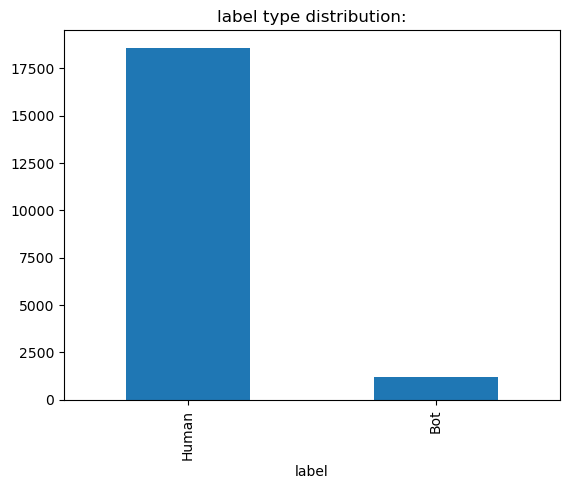

<Figure size 500x300 with 0 Axes>

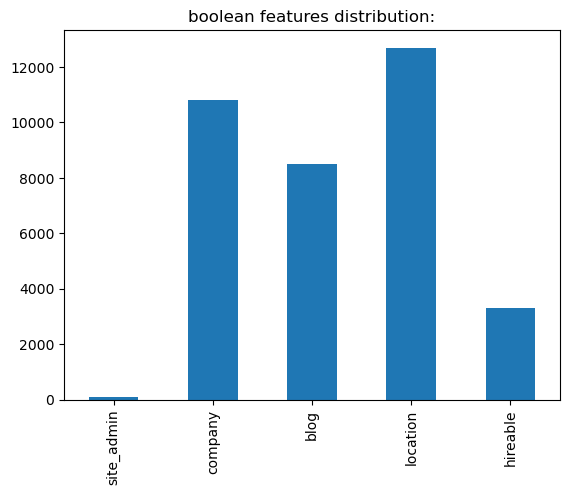

<Figure size 500x300 with 0 Axes>

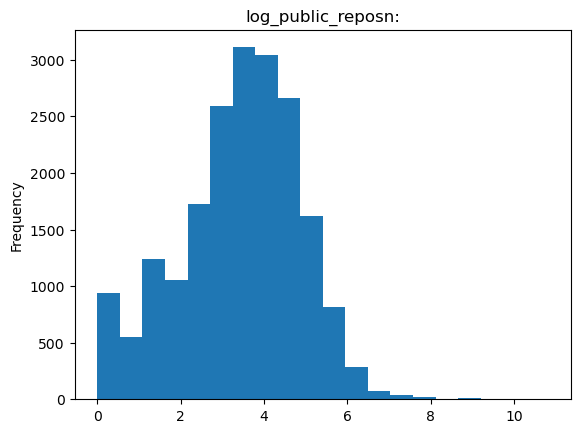

<Figure size 500x300 with 0 Axes>

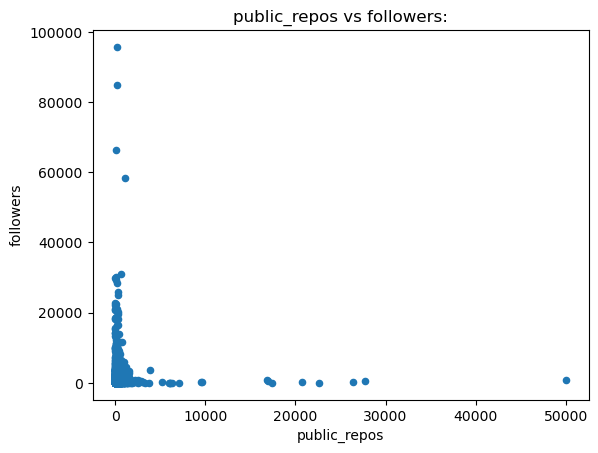

<Figure size 500x300 with 0 Axes>

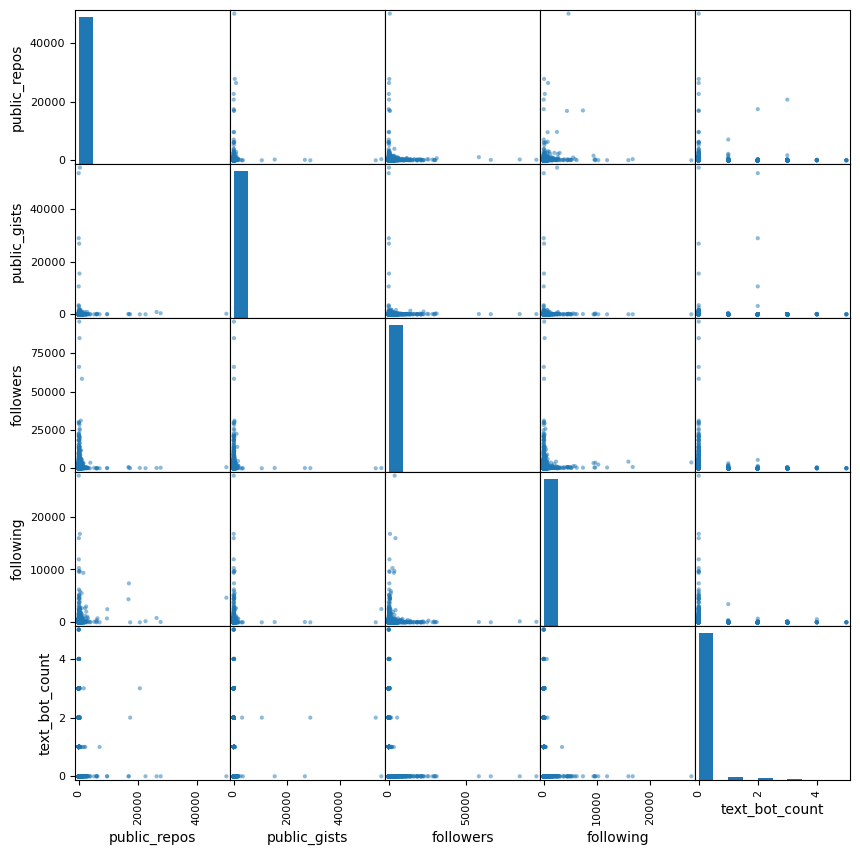

In [35]:
import matplotlib.pyplot as plt

# 条形图
df['label'].value_counts().plot(kind='bar')
plt.title('label type distribution:')
plt.figure(figsize=(5, 3))
plt.show()

# 堆积柱状图 distributio
df[['site_admin', 'company', 'blog', 'location', 'hireable']].sum().plot(kind='bar')
plt.title('boolean features distribution:')
plt.figure(figsize=(5, 3))
plt.show()

# 直方图
df['log_public_repos'].plot(kind='hist', bins=20)
plt.title('log_public_reposn:')
plt.figure(figsize=(5, 3))
plt.show()

# 散点图
df.plot.scatter(x='public_repos', y='followers')
plt.title('public_repos vs followers:')
plt.figure(figsize=(5, 3))
plt.show()

# 散点矩阵
pd.plotting.scatter_matrix(df[['public_repos', 'public_gists', 'followers', 'following', 'text_bot_count']], figsize=(10, 10))
plt.show()


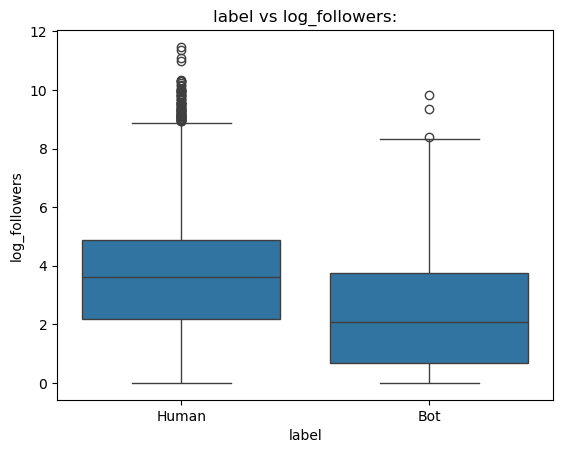

<Figure size 500x300 with 0 Axes>

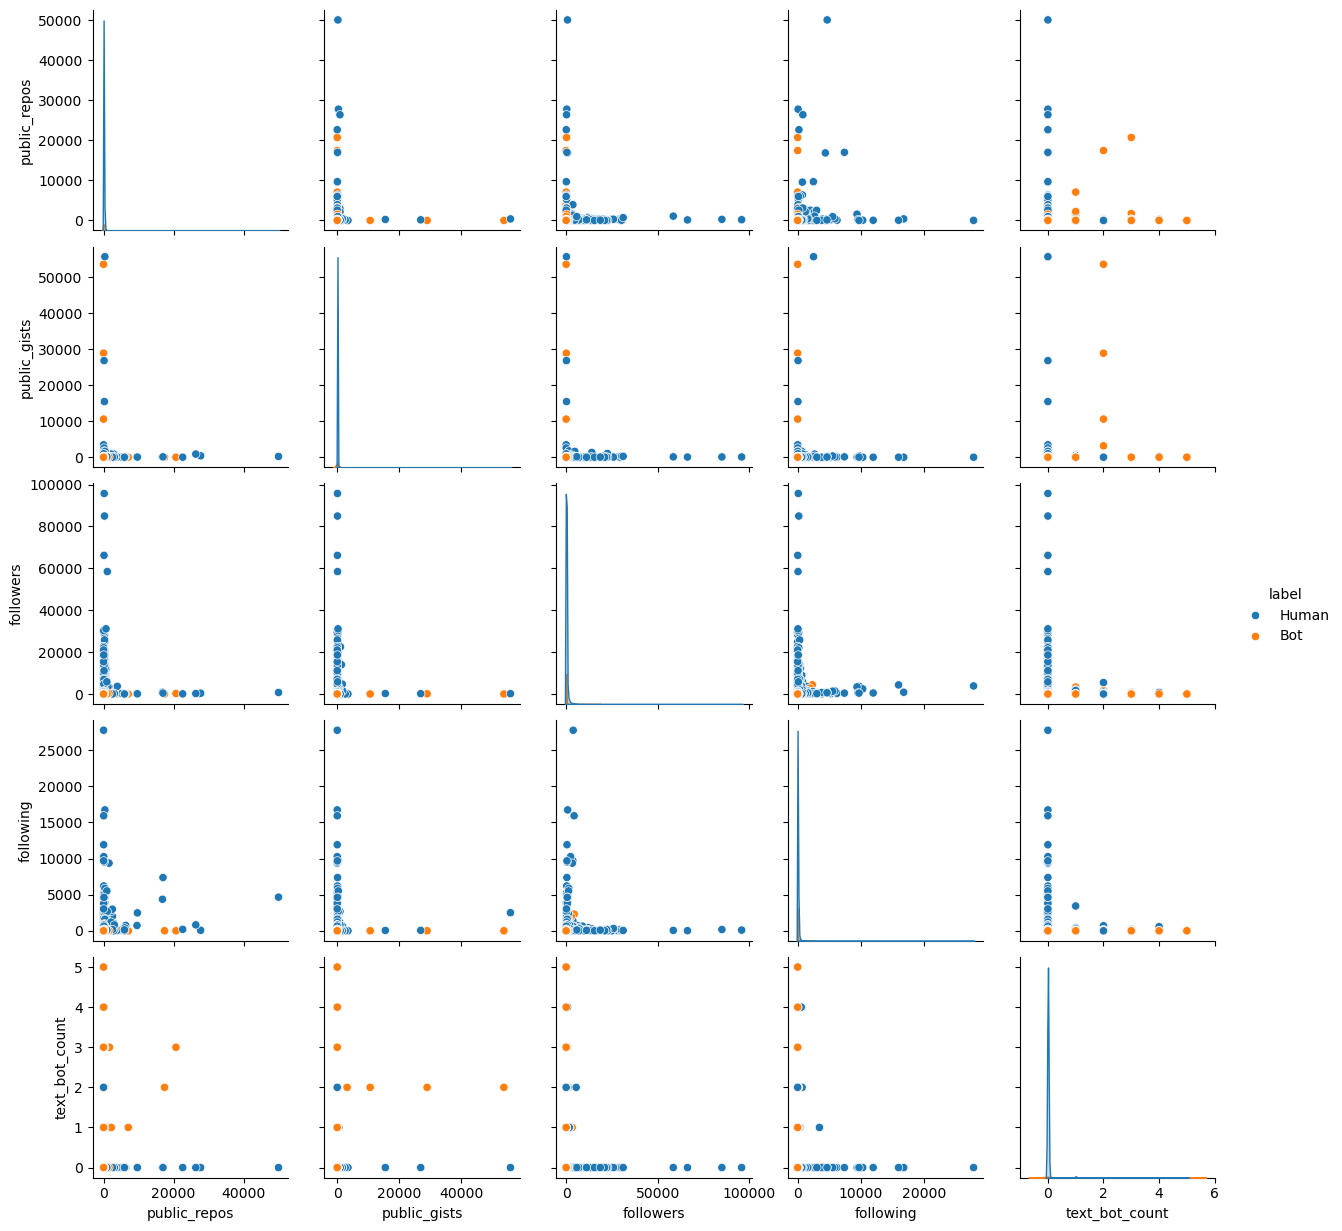

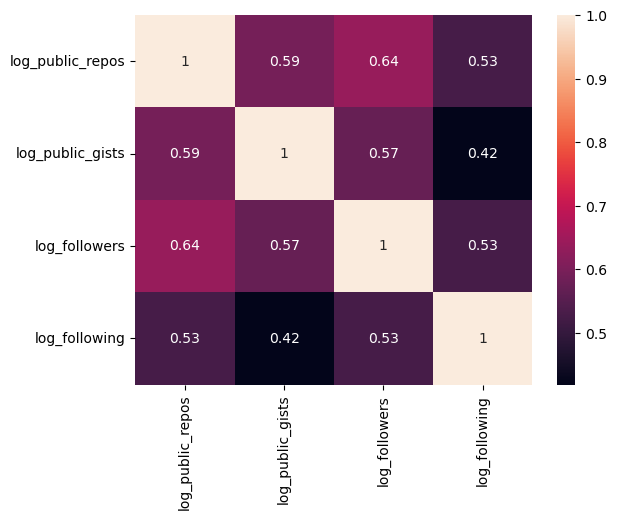

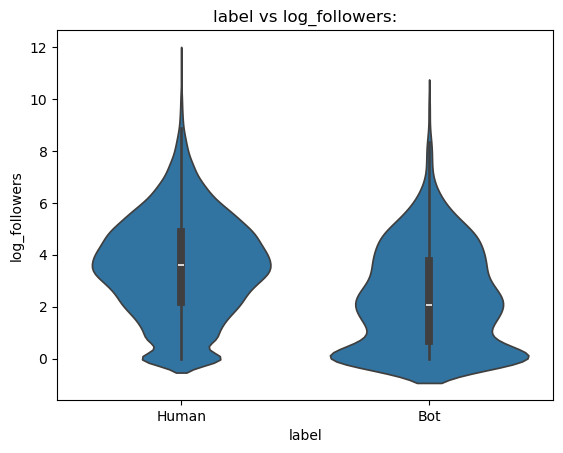

<Figure size 500x300 with 0 Axes>

In [36]:
'''
使用Seaborn绘制图表
    - 绘制箱线图：展示不同label类别下log_followers的分布。
    - 绘制成对图：展示不同特征之间的成对关系，并根据label分类。
    - 绘制热图：展示log_public_repos、log_public_gists、log_followers和log_following等特征之间的相关性。
    - 绘制小提琴图：展示label与log_followers之间的分布差异。
'''
import seaborn as sns

# 箱线图
sns.boxplot(x='label', y='log_followers', data=df)
plt.title('label vs log_followers:')
plt.figure(figsize=(5, 3))
plt.show()

# 成对图
sns.pairplot(df[['public_repos', 'public_gists', 'followers', 'following', 'text_bot_count', 'label']], hue='label')
plt.show()

# 热图
sns.heatmap(df[['log_public_repos', 'log_public_gists', 'log_followers', 'log_following']].corr(), annot=True)
plt.show() 

# 小提琴图
sns.violinplot(x='label', y='log_followers', data=df)
plt.title('label vs log_followers:')
plt.figure(figsize=(5, 3))
plt.show() 

In [41]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title='HW8 Report', explorative=True)
profile.to_file('HW8.html')

Summarize dataset:  81%|████████  | 21/26 [00:01<00:00, 34.46it/s, Calculate auto correlation]        c:\Users\zzsyp\anaconda3\Lib\site-packages\ydata_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 0 0 0]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(
c:\Users\zzsyp\anaconda3\Lib\site-packages\ydata_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 0 0 0]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(
c:\Users\zzsyp\anaconda3\Lib\site-packages\ydata_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: Setting an item of incompa